<img src="title_page.jpg" alt="title page" />


### Import modules

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from scipy import stats
# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [302]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

### Read Data

  Attribute Information: (classes: edible=e, poisonous=p)
  
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d


In [404]:
df=pd.read_csv('../mushroom_UCI_data/agaricus-lepiota.data')

### EDA and some vizies 

In [405]:
df.describe()

p     x     s     n     t   p.1     f     c   n.1     k  ...   s.2  \
count   8123  8123  8123  8123  8123  8123  8123  8123  8123  8123  ...  8123   
unique     2     6     4    10     2     9     2     2     2    12  ...     4   
top        e     x     y     n     f     n     f     c     b     b  ...     s   
freq    4208  3655  3244  2283  4748  3528  7913  6811  5612  1728  ...  4935   

           w   w.1   p.2   w.2     o   p.3   k.1   s.3     u  
count   8123  8123  8123  8123  8123  8123  8123  8123  8123  
unique     9     9     1     4     3     5     9     6     7  
top        w     w     p     w     o     p     w     v     d  
freq    4463  4383  8123  7923  7487  3967  2388  4040  3148  

[4 rows x 23 columns]

In [408]:
columns=['class','cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor','gill_attachment',          
'gill_spacing','gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring' ,'stalk_surface_below_ring', 
'stalk_color_above_ring','stalk_color_below_ring' ,'veil_type','veil_color','ring_number','ring_type','spore_print_color',
'population','habitat']

In [409]:
df.columns=columns

In [410]:
df.head()

class cap_shape cap_surface cap_color bruises odor gill_attachment  \
0     e         x           s         y       t    a               f   
1     e         b           s         w       t    l               f   
2     p         x           y         w       t    p               f   
3     e         x           s         g       f    n               f   
4     e         x           y         y       t    a               f   

  gill_spacing gill_size gill_color  ... stalk_surface_below_ring  \
0            c         b          k  ...                        s   
1            c         b          n  ...                        s   
2            c         n          n  ...                        s   
3            w         b          k  ...                        s   
4            c         b          n  ...                        s   

  stalk_color_above_ring stalk_color_below_ring veil_type veil_color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring_number ring_type spore_print_color population habitat  
0           o         p                 n          n       g  
1           o         p                 n          n       m  
2           o         p                 k          s       u  
3           o         e                 n          a       g  
4           o         p                 k          n       g  

[5 rows x 23 columns]

In [28]:
df.stalk_root.unique()

array(['c', 'e', 'b', 'r', '?'], dtype=object)

In [411]:
 # Check for unique values in each column
 # option to convert to dictionary if nessesary 
# feature={}
for col in df.columns:
    print(col, ':', df[col].unique())

class : ['e' 'p']
cap_shape : ['x' 'b' 's' 'f' 'k' 'c']
cap_surface : ['s' 'y' 'f' 'g']
cap_color : ['y' 'w' 'g' 'n' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['a' 'l' 'p' 'n' 'f' 'c' 'y' 's' 'm']
gill_attachment : ['f' 'a']
gill_spacing : ['c' 'w']
gill_size : ['b' 'n']
gill_color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk_shape : ['e' 't']
stalk_root : ['c' 'e' 'b' 'r' '?']
stalk_surface_above_ring : ['s' 'f' 'k' 'y']
stalk_surface_below_ring : ['s' 'f' 'y' 'k']
stalk_color_above_ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk_color_below_ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil_type : ['p']
veil_color : ['w' 'n' 'o' 'y']
ring_number : ['o' 't' 'n']
ring_type : ['p' 'e' 'l' 'f' 'n']
spore_print_color : ['n' 'k' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['n' 's' 'a' 'v' 'y' 'c']
habitat : ['g' 'm' 'u' 'd' 'p' 'w' 'l']


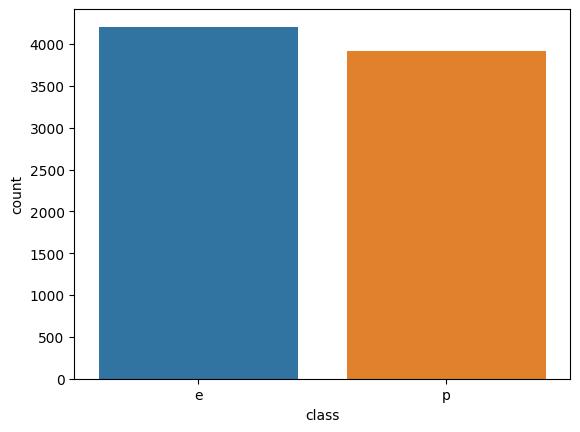

In [412]:
 # Check distribution of the target variable
sns.countplot(x='class', data=df)
plt.show()

<AxesSubplot:xlabel='odor', ylabel='count'>

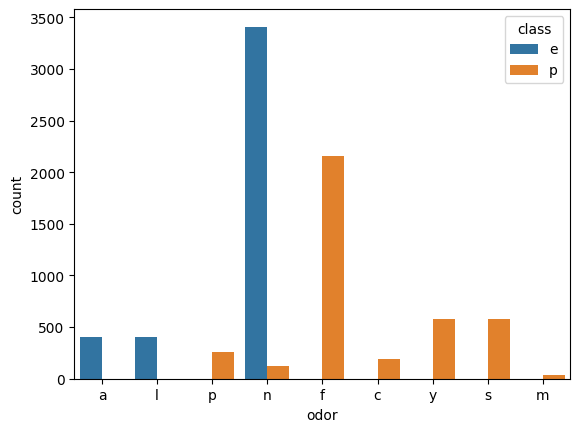

In [413]:
sns.countplot(x='odor', hue='class', data=df)

In [44]:
# Check correlation between variables
# sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
# plt.show()

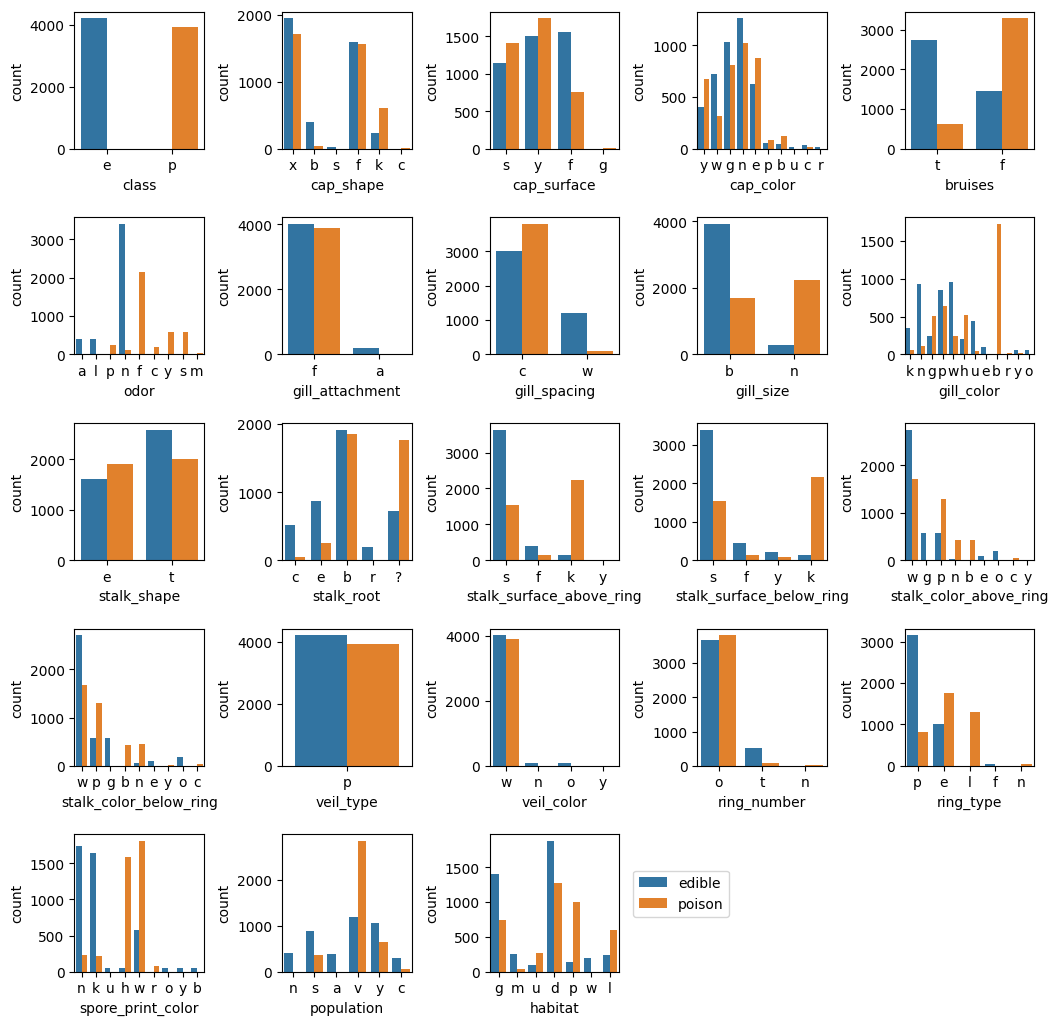

In [92]:
 # Check distribution of each categorical feature
# for col in df.columns[:-1]:
#     sns.countplot(x=col, hue='class', data=df)
 #    plt.show()
rows,cols =5,5 
fig, axes = plt.subplots(rows, cols, figsize=(12,12))
k=0
for i in range(rows): 
    for j in range(cols):
        mycol=df.columns[k]
        # sns.violinplot(ax=axes[i,j],data=df.drop(['id','Unnamed: 32'],axis=1),x='diagnosis',y=mycol)
        sns.countplot(ax=axes[i,j], x=mycol, hue='class', data=df)
        # axes[i,j].set_xlabel(None)
        legend_handles, _= axes[i,j].get_legend_handles_labels()
        axes[i,j].get_legend().remove()  # use this is legend=None does not work  
        

        k+=1
#         print(k)
        if k == len(df.columns): break

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.6,
                    hspace=0.5)
axes[4, 4].remove()  # remove unused subplot
axes[4, 3].remove()  # remove unused subplot
plt.legend(legend_handles,['edible','poison'],loc='lower right',bbox_to_anchor=(1.9,0.35))


# include logical tests  here 
	Logical rules given below seem to be the simplest possible for the
	mushroom dataset and therefore should be treated as benchmark results.

	Disjunctive rules for poisonous mushrooms, from most general
	to most specific:

	P_1) odor=NOT(almond.OR.anise.OR.none)
	     120 poisonous cases missed, 98.52% accuracy
    
    P_2) spore-print-color=green
	     48 cases missed, 99.41% accuracy
         
	P_3) odor=none.AND.stalk-surface-below-ring=scaly.AND.
	          (stalk-color-above-ring=NOT.brown) 
	     8 cases missed, 99.90% accuracy
         
	P_4) habitat=leaves.AND.cap-color=white
	         100% accuracy     

	Rule P_4) may also be

	P_4') population=clustered.AND.cap_color=white

	These rule involve 6 attributes (out of 22). Rules for edible
	mushrooms are obtained as negation of the rules given above, for
	example the rule:

	odor=(almond.OR.anise.OR.none).AND.spore-print-color=NOT.green

	gives 48 errors, or 99.41% accuracy on the whole dataset.

	Several slightly more complex variations on these rules exist,
	involving other attributes, such as gill_size, gill_spacing,
	stalk_surface_above_ring, but the rules given above are the simplest
	we have found.



In [190]:
# print(df['class'].value_counts())
print("number of edible: %i proportion (bassline accuracy): %.3f " % (df['class'].value_counts()[0],df['class'].value_counts()[0]/len(df)) )
print("number of poisionous: %i proportion: %.3f " % (df['class'].value_counts()[1],df['class'].value_counts()[1]/len(df)) )

number of edible: 4208 proportion (bassline accuracy): 0.518 
number of poisionous: 3915 proportion: 0.482 


In [244]:
# P_1) odor=NOT(almond.OR.anise.OR.none)
#   120 poisonous cases missed, 98.52% accuracy

# print (sum(((df['odor'] == 'l') | (df['odor'] == 'a') | (df['odor'] == 'n'))))
vc1=df[((df['odor'] == 'l') | (df['odor'] == 'a') | (df['odor'] == 'n'))]['class'].value_counts()
vc2=df[-((df['odor'] == 'l') | (df['odor'] == 'a') | (df['odor'] == 'n'))]['class'].value_counts()
print(vc1)
tn,fn=vc1
tp=vc2[0]
fp=0
print(tn,fp)
print(fn,tp)
print("accuracy of logical rule P_1: %.4f " %((4208+3795)/len(df)) )
print("recall/sensitivity:  %.4f"%(tp/(tp+fn)) )
print("precision:  %.4f"%(tp/(tp+fp)) )
print("f1-score (harmonic mean of precision and recall ):  %.4f"%((2*tp)/(2*tp+fn+fp)) )

e    4208
p     120
Name: class, dtype: int64
4208 0
120 3795
accuracy of logical rule P_1: 0.9852 
recall/sensitivity:  0.9693
precision:  1.0000
f1-score (harmonic mean of precision and recall ):  0.9844


review of bayesian stats:
- P(m=p):0.482
- P(m=e):0.518
- P(tn)=P(m=e,odor=good)=0.518
- P(fp)=P(m=e,odor=bad)=0.0
- P(tp)=P(m=p,odor=bad)=0.467
- P(fn)=P(m=p,odor=good)=0.015
- P(odor=good|m=p) = 0.015/(0.467+0.015) = 0.0311
- P(m=p|odor=good) = 0.015/(0.518+0.015) = 0.0281    'fn/(fn+tn) is known as False omission rate'

P(m=p|odor=good)= P(odor=good|m=p) * P(m=p) / P(odor=good) 

= 0.0321 * 0.482 / P(m=e,odor=good)+P(m=p,odor=good) = 0.0311 * 0.482 / (0.015+0.518) = 0.0281



In [246]:
#  P_2) spore-print-color=green 48 cases missed, 99.41% accuracy
P_1=df[((df['odor'] == 'l') | (df['odor'] == 'a') | (df['odor'] == 'n'))]
p_2=P_1[ P_1['spore_print_color']=='r' ]['class'].value_counts()[0] #  this grabs 72 of the 120  
tp=tp+p_2
fn=fn-p_2
print(tn,fp)
print(fn,tp)
print("accuracy of logical rule P_1: %.4f " %((4208+3795)/len(df)) )
print("recall/sensitivity:  %.4f"%(tp/(tp+fn)) )
print("precision:  %.4f"%(tp/(tp+fp)) )
print("f1-score (harmonic mean of precision and recall ):  %.4f"%((2*tp)/(2*tp+fn+fp)) )

4208 0
48 3939
accuracy of logical rule P_1: 0.9852 
recall/sensitivity:  0.9880
precision:  1.0000
f1-score (harmonic mean of precision and recall ):  0.9939


#### We can see that just by using simple 'odor' and 'spore_print_color' we can distinguish if a mushroom is poisonous
#### ie. a foul smelling mushroom with green spores is more likely to be poisonous.  

### Encoding the categorical vars 
#### we are using nominal encoding and a modified data set where the odor is ordinally encoded.

In [102]:
# Using LabelEncoder to convert catergory values to nominal 
from sklearn.preprocessing import LabelEncoder
df_encoded=df.copy()
labelencoder=LabelEncoder()
for column in df.columns:
    df_encoded[column] = labelencoder.fit_transform(df_encoded[column])

df_encoded.head()

class  cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0      0          5            2          9        1     0                1   
1      0          0            2          8        1     3                1   
2      1          5            3          8        1     6                1   
3      0          5            2          3        0     5                1   
4      0          5            3          9        1     0                1   

   gill_spacing  gill_size  gill_color  ...  stalk_surface_below_ring  \
0             0          0           4  ...                         2   
1             0          0           5  ...                         2   
2             0          1           5  ...                         2   
3             1          0           4  ...                         2   
4             0          0           5  ...                         2   

   stalk_color_above_ring  stalk_color_below_ring  veil_type  veil_color  \
0                       7                       7          0           2   
1                       7                       7          0           2   
2                       7                       7          0           2   
3                       7                       7          0           2   
4                       7                       7          0           2   

   ring_number  ring_type  spore_print_color  population  habitat  
0            1          4                  3           2        1  
1            1          4                  3           2        3  
2            1          4                  2           3        5  
3            1          0                  3           0        1  
4            1          4                  2           2        1  

[5 rows x 23 columns]

In [432]:
# Using OrdinalEncoder to convert catergory values to Ordinal
from sklearn.preprocessing import OrdinalEncoder
df_oencoded=df.copy()
print(df_oencoded['odor'].head())
odor_order=[['n'],['a'],['l'],['m'],['c'],['p'],['s'],['y'],['f']]
Ordinalencoder=OrdinalEncoder(categories=[['n','a','l','m','c','p','s','y','f']])
Ordinalencoder.fit(odor_order)
print(Ordinalencoder.categories_)
test_encoded = Ordinalencoder.transform(df_oencoded['odor'].values.reshape(-1,1))
df_oencoded['odor']=test_encoded.flatten().astype(int)
df_oencoded['odor'].head()

0    a
1    l
2    p
3    n
4    a
Name: odor, dtype: object
[array(['n', 'a', 'l', 'm', 'c', 'p', 's', 'y', 'f'], dtype=object)]


0    1
1    2
2    5
3    0
4    1
Name: odor, dtype: int64

In [433]:
df_oencoded

class cap_shape cap_surface cap_color bruises  odor gill_attachment  \
0        e         x           s         y       t     1               f   
1        e         b           s         w       t     2               f   
2        p         x           y         w       t     5               f   
3        e         x           s         g       f     0               f   
4        e         x           y         y       t     1               f   
...    ...       ...         ...       ...     ...   ...             ...   
8118     e         k           s         n       f     0               a   
8119     e         x           s         n       f     0               a   
8120     e         f           s         n       f     0               a   
8121     p         k           y         n       f     7               f   
8122     e         x           s         n       f     0               a   

     gill_spacing gill_size gill_color  ... stalk_surface_below_ring  \
0               c         b          k  ...                        s   
1               c         b          n  ...                        s   
2               c         n          n  ...                        s   
3               w         b          k  ...                        s   
4               c         b          n  ...                        s   
...           ...       ...        ...  ...                      ...   
8118            c         b          y  ...                        s   
8119            c         b          y  ...                        s   
8120            c         b          n  ...                        s   
8121            c         n          b  ...                        k   
8122            c         b          y  ...                        s   

     stalk_color_above_ring stalk_color_below_ring veil_type veil_color  \
0                         w                      w         p          w   
1                         w                      w         p          w   
2                         w                      w         p          w   
3                         w                      w         p          w   
4                         w                      w         p          w   
...                     ...                    ...       ...        ...   
8118                      o                      o         p          o   
8119                      o                      o         p          n   
8120                      o                      o         p          o   
8121                      w                      w         p          w   
8122                      o                      o         p          o   

     ring_number ring_type spore_print_color population habitat  
0              o         p                 n          n       g  
1              o         p                 n          n       m  
2              o         p                 k          s       u  
3              o         e                 n          a       g  
4              o         p                 k          n       g  
...          ...       ...               ...        ...     ...  
8118           o         p                 b          c       l  
8119           o         p                 b          v       l  
8120           o         p                 b          c       l  
8121           o         e                 w          v       l  
8122           o         p                 o          c       l  

[8123 rows x 23 columns]

In [434]:
# this then does the nominal encoding in pandas and skips the odor col
for col in df_oencoded.columns:
    if not col=='odor': df_oencoded[col]=df_oencoded[col].astype("category").cat.codes

In [122]:
# this does the nominal encoding in pandas 
df_encoded=df.copy()
for col in df.columns:
    df_encoded[col]=df_encoded[col].astype("category").cat.codes

In [83]:
df_encoded.head()

class  cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0      0          5            2          9        1     0                1   
1      0          0            2          8        1     3                1   
2      1          5            3          8        1     6                1   
3      0          5            2          3        0     5                1   
4      0          5            3          9        1     0                1   

   gill_spacing  gill_size  gill_color  ...  stalk_surface_below_ring  \
0             0          0           4  ...                         2   
1             0          0           5  ...                         2   
2             0          1           5  ...                         2   
3             1          0           4  ...                         2   
4             0          0           5  ...                         2   

   stalk_color_above_ring  stalk_color_below_ring  veil_type  veil_color  \
0                       7                       7          0           2   
1                       7                       7          0           2   
2                       7                       7          0           2   
3                       7                       7          0           2   
4                       7                       7          0           2   

   ring_number  ring_type  spore_print_color  population  habitat  
0            1          4                  3           2        1  
1            1          4                  3           2        3  
2            1          4                  2           3        5  
3            1          0                  3           0        1  
4            1          4                  2           2        1  

[5 rows x 23 columns]

In [124]:
for col in df_encoded.columns:
    print(col, ':', df_encoded[col].unique())

class : [0 1]
cap_shape : [5 0 4 2 3 1]
cap_surface : [2 3 0 1]
cap_color : [9 8 3 4 2 5 0 7 1 6]
bruises : [1 0]
odor : [0 3 6 5 2 1 8 7 4]
gill_attachment : [1 0]
gill_spacing : [0 1]
gill_size : [0 1]
gill_color : [ 4  5  2  7 10  3  9  1  0  8 11  6]
stalk_shape : [0 1]
stalk_root : [2 3 1 4 0]
stalk_surface_above_ring : [2 0 1 3]
stalk_surface_below_ring : [2 0 3 1]
stalk_color_above_ring : [7 3 6 4 0 2 5 1 8]
stalk_color_below_ring : [7 6 3 0 4 2 8 5 1]
veil_type : [0]
veil_color : [2 0 1 3]
ring_number : [1 2 0]
ring_type : [4 0 2 1 3]
spore_print_color : [3 2 6 1 7 5 4 8 0]
population : [2 3 0 4 5 1]
habitat : [1 3 5 0 4 6 2]


<AxesSubplot:xlabel='odor', ylabel='count'>

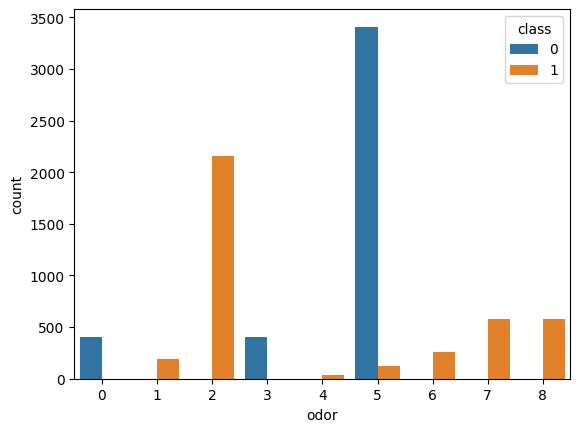

In [435]:
# nominal encoding is alphanumeric
sns.countplot(x='odor', hue='class', data=df_encoded)

<AxesSubplot:xlabel='odor', ylabel='count'>

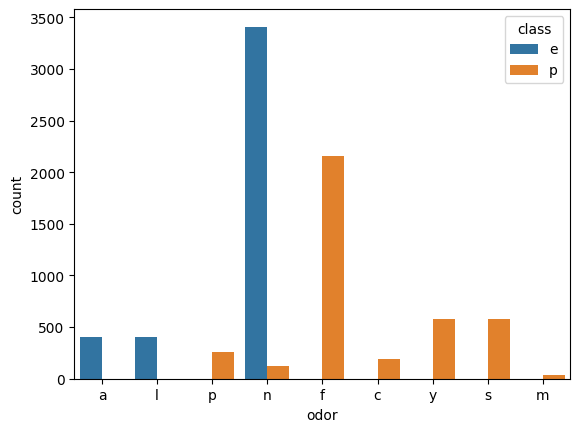

In [436]:
sns.countplot(x='odor', hue='class', data=df)

#### above was nomianlly ordered 
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s

going to subjectively order making sure bad smell is a higher number corresponding with logical rule P_1

odor_order=np.asarray([['n'],['a'],['l'],['m'],['c'],['p'],['s'],['y'],['f']])


<AxesSubplot:xlabel='odor', ylabel='count'>

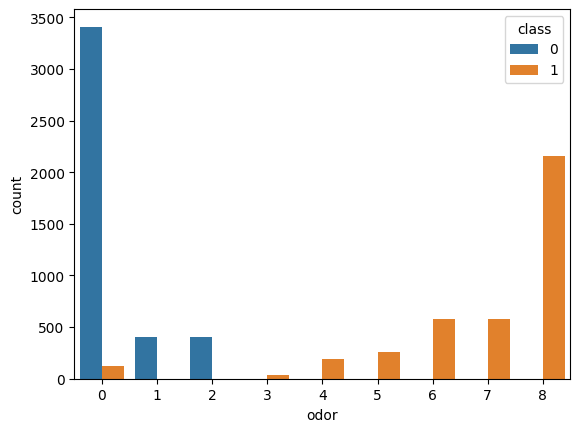

In [437]:
# ordianal encoding for odor 
sns.countplot(x='odor', hue='class', data=df_oencoded)

In [712]:
# correlation for nominal - these are meaningless but want to compare with odor ordinal
df_encoded.corr().iloc[0]

class                       1.000000
cap_shape                   0.052826
cap_surface                 0.178440
cap_color                  -0.031361
bruises                    -0.501758
odor                       -0.093675
gill_attachment             0.129188
gill_spacing               -0.348358
gill_size                   0.539944
gill_color                 -0.530574
stalk_shape                -0.101888
stalk_root                 -0.379688
stalk_surface_above_ring   -0.334712
stalk_surface_below_ring   -0.298901
stalk_color_above_ring     -0.154096
stalk_color_below_ring     -0.146824
veil_type                        NaN
veil_color                  0.145133
ring_number                -0.214349
ring_type                  -0.411942
spore_print_color           0.172063
population                  0.298776
habitat                     0.216990
Name: class, dtype: float64

In [713]:
# correlation for nominal - these are meaningless but want to compare with odor ordinal
df_oencoded.corr().iloc[0]

class                       1.000000
cap_shape                   0.052826
cap_surface                 0.178440
cap_color                  -0.031361
bruises                    -0.501758
odor                        0.931021
gill_attachment             0.129188
gill_spacing               -0.348358
gill_size                   0.539944
gill_color                 -0.530574
stalk_shape                -0.101888
stalk_root                 -0.379688
stalk_surface_above_ring   -0.334712
stalk_surface_below_ring   -0.298901
stalk_color_above_ring     -0.154096
stalk_color_below_ring     -0.146824
veil_type                        NaN
veil_color                  0.145133
ring_number                -0.214349
ring_type                  -0.411942
spore_print_color           0.172063
population                  0.298776
habitat                     0.216990
Name: class, dtype: float64

### note: the '?' for stalk root has been coded as a 0

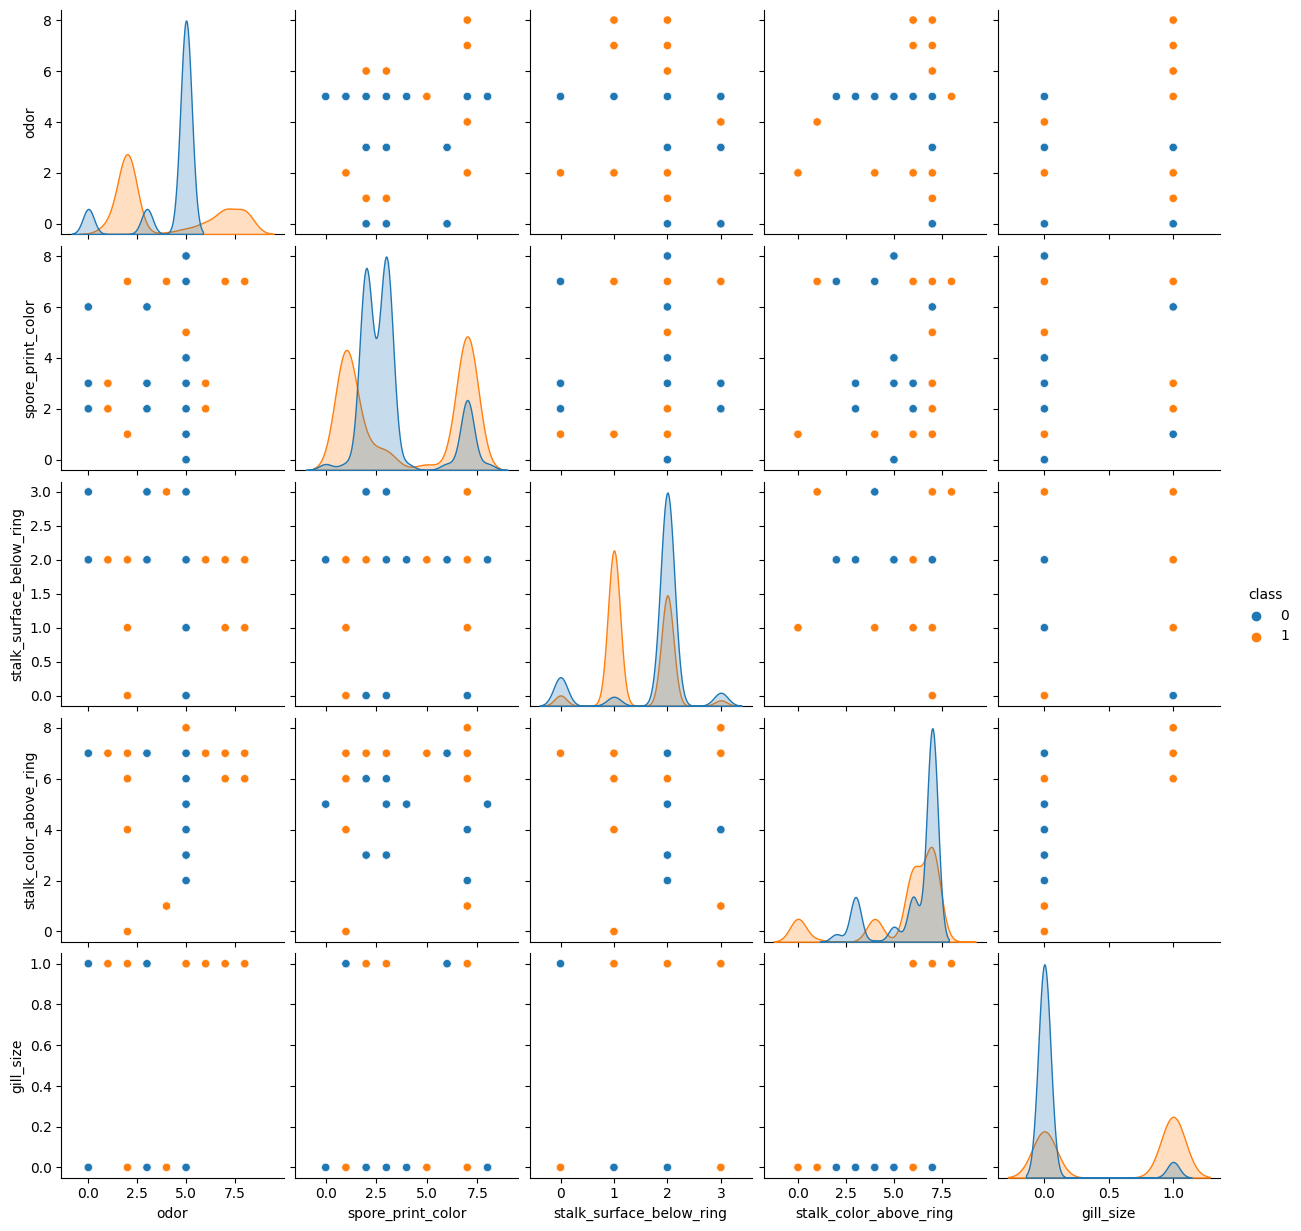

In [716]:
# sns.pairplot(data=df_encoded.iloc[:,:4],hue='class')
# variable for pairplot selected from the simple logical rules
# sns.pairplot(data=df_encoded[['class','odor','spore_print_color','stalk_surface_below_ring','stalk_surface_above_ring','population','habitat','cap_color','gill_size']],hue='class')
sns.pairplot(data=df_encoded[['class','odor','spore_print_color','stalk_surface_below_ring','stalk_color_above_ring','gill_size']],hue='class')

####  The veil_type variable was fixed to a single value so this axis is removed. 
#### It is worth noting in many cases in this notebook to perform analogous calculation on either the nominal or 'odor'-ordinal dataset, I have used the same cell and replaced the input X,y with Xo,yo

In [681]:
# predict test class:
X=df_encoded.drop(['class','veil_type'],axis=1).values
y=df_encoded['class'].values  # 1 is for poisonous 
xcols=df_encoded.drop(['class','veil_type'],axis=1).columns
xcols

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_color', 'ring_number', 'ring_type',
       'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [682]:
X[:,3:6]

array([[1, 0, 1],
       [1, 3, 1],
       [1, 6, 1],
       ...,
       [0, 5, 0],
       [0, 8, 1],
       [0, 5, 0]], dtype=int8)

In [683]:
# predict test class:
Xo=df_oencoded.drop(['class','veil_type'],axis=1).values
yo=df_oencoded['class'].values  # 1 is for poisonous 

In [684]:
Xo[:,3:6]

array([[1, 1, 1],
       [1, 2, 1],
       [1, 5, 1],
       ...,
       [0, 0, 0],
       [0, 7, 1],
       [0, 0, 0]])

### Logistic regression


In [698]:
# doing an L2 model
X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size = 0.2, random_state = 1)
# Build Model

clf=LogisticRegression(random_state=42,max_iter=3000,solver='liblinear',penalty='l2')
# Fit Model
clf.fit(X_train,y_train)
# Score
print("accuracy: ",clf.score(X_test,y_test))
y_pred=clf.predict(X_test)
print("this is the default for confusion matrix()")
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# predicted test probability:
# preds = clf.predict_proba(X_test)[:,1]

accuracy:  0.9907692307692307
this is the default for confusion matrix()
[['TN' 'FP']
 ['FN' 'TP']]
confusion matrix: 
[[796   0]
 [ 15 814]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       796
           1       1.00      0.98      0.99       829

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



#### Plot coefficents for L2 regularization 

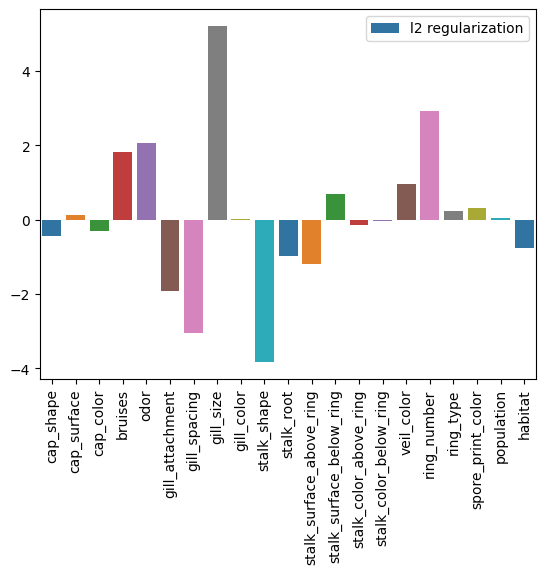

In [699]:
columns=df_encoded.drop(['class','veil_type'],axis=1).columns
ax=sns.barplot(x=columns, y=clf.coef_[0],palette='tab10',label='l2 regularization') 
ax=plt.xticks(rotation=90)
ax=plt.legend()

### Example of how RFE is picking out the same best features based on coef 

In [696]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
clf=LogisticRegression(random_state=42,max_iter=3000,solver='liblinear',penalty='l2')
rfe = RFE(estimator=clf, n_features_to_select=4, step=1)
rfe.fit(X_train,y_train)
rfe.support_
print(rfe.score(X_test,y_test))
xcols[rfe.support_]

0.936


Index(['gill_spacing', 'gill_size', 'stalk_surface_above_ring', 'veil_color'], dtype='object')

In [697]:
X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size = 0.2, random_state = 1)
clf=LogisticRegression(random_state=42,max_iter=3000,solver='liblinear',penalty='l2')
rfe = RFE(estimator=clf, n_features_to_select=4, step=1)
rfe.fit(X_train,y_train)
rfe.support_
print(rfe.score(X_test,y_test))
xcols[rfe.support_]

0.932923076923077


Index(['gill_attachment', 'gill_spacing', 'gill_size',
       'stalk_surface_above_ring'],
      dtype='object')

### Logistic regression on L1

In [705]:

# doing an L1 model
X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size = 0.2, random_state = 1)
# Build Model

clf=LogisticRegression(random_state=42,max_iter=3000,solver='liblinear',penalty='l1')
# Fit Model
clf.fit(X_train,y_train)
# Score
print("accuracy: ",clf.score(X_test,y_test))
y_pred=clf.predict(X_test)
print("this is the default for confusion matrix()")
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# predicted test probability:
# preds = clf.predict_proba(X_test)[:,1]

accuracy:  0.9932307692307693
this is the default for confusion matrix()
[['TN' 'FP']
 ['FN' 'TP']]
confusion matrix: 
[[796   0]
 [ 11 818]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       796
           1       1.00      0.99      0.99       829

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



#### plot coefficents for L1 regularization 

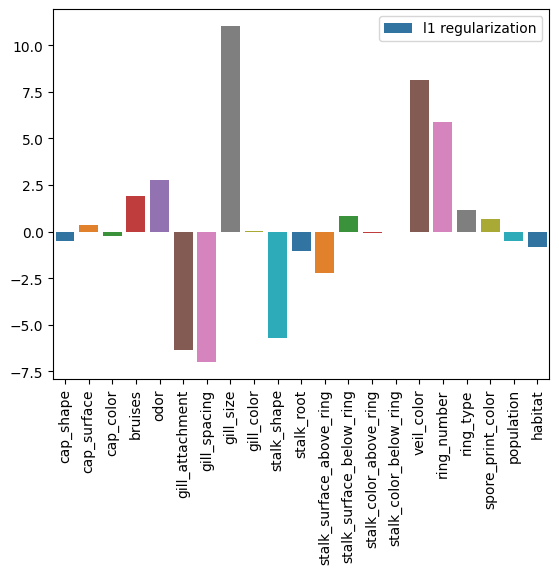

In [706]:
ax=sns.barplot(x=df_encoded.drop(['class','veil_type'],axis=1).columns, y=clf.coef_[0],palette='tab10',label='l1 regularization') 
ax=plt.xticks(rotation=90)
ax=plt.legend()

In [702]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
clf=LogisticRegression(random_state=42,max_iter=3000,solver='liblinear',penalty='l1')
rfe = RFE(estimator=clf, n_features_to_select=5, step=1)
rfe.fit(X_train,y_train)
rfe.support_
print(rfe.score(X_test,y_test))
# columns[rfe.support_]

0.936


Index(['gill_spacing', 'gill_size', 'stalk_shape', 'stalk_surface_above_ring',
       'veil_color'],
      dtype='object')

In [703]:
xcols[rfe.support_]

Index(['gill_spacing', 'gill_size', 'stalk_shape', 'stalk_surface_above_ring',
       'veil_color'],
      dtype='object')

In [707]:
X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size = 0.2, random_state = 1)
clf=LogisticRegression(random_state=42,max_iter=3000,solver='liblinear',penalty='l1')
rfe = RFE(estimator=clf, n_features_to_select=5, step=1)
rfe.fit(X_train,y_train)
rfe.support_
print(rfe.score(X_test,y_test))
xcols[rfe.support_]

0.9372307692307692


Index(['gill_attachment', 'gill_spacing', 'gill_size',
       'stalk_surface_above_ring', 'veil_color'],
      dtype='object')

### below RFECV fit takes a while 

In [461]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

min_features_to_select = 1  # Minimum number of features to consider
clf = LogisticRegression(random_state=42,max_iter=3000,solver='liblinear',penalty='l1')
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 13


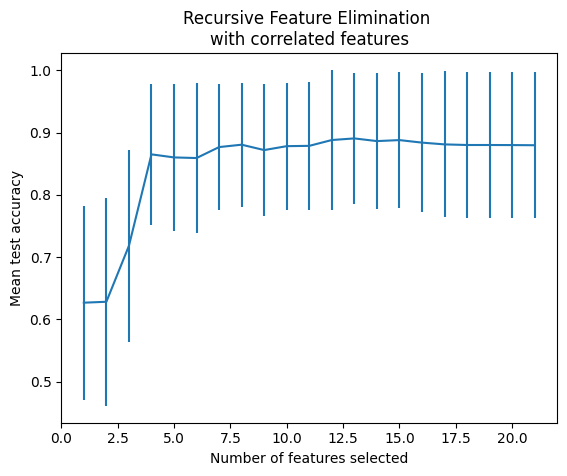

In [462]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [463]:
print(rfecv.ranking_)
columns[rfecv.support_]

[9 1 8 4 1 1 1 1 5 1 1 1 1 3 7 1 1 1 2 1 6]


Index(['cap_surface', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'veil_color', 'ring_number', 'ring_type',
       'population'],
      dtype='object')

## SVM part

In [720]:
X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size = 0.2, random_state = 1)
# clf = make_pipeline(StandardScaler(), SVC(kernel='linear',gamma='auto'))

# should be able to use regularization on the SVC 

clf=SVC(C=10, kernel='linear',gamma='auto') # the c=10 came from the GridSearchCV
# clf = SVC(random_state=42, gamma="auto")
clf.fit(X_train, y_train)
# clf.score(X_test,y_test)

print("accuracy: ",clf.score(X_test,y_test))
y_pred=clf.predict(X_test)
print("this is the default for confusion matrix()")
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy:  1.0
this is the default for confusion matrix()
[['TN' 'FP']
 ['FN' 'TP']]
confusion matrix: 
[[796   0]
 [  0 829]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       796
           1       1.00      1.00      1.00       829

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [718]:
clf.class_weight_
clf.coef_

array([[ 1.43423231e-03,  1.36641304e-02, -3.54097819e-02,
         2.09405396e+00, -3.55782306e-01, -1.92366895e+00,
        -1.15727034e+01,  1.06382144e+01, -7.37159763e-03,
        -3.35801530e+00, -5.82849336e+00, -5.43355806e+00,
        -7.68957388e-02,  1.15496009e-03,  3.51232264e-03,
         2.32457632e+01, -1.13532652e+00,  2.65873849e+00,
        -1.49069147e-01, -4.28305903e-01,  4.55364269e-02]])

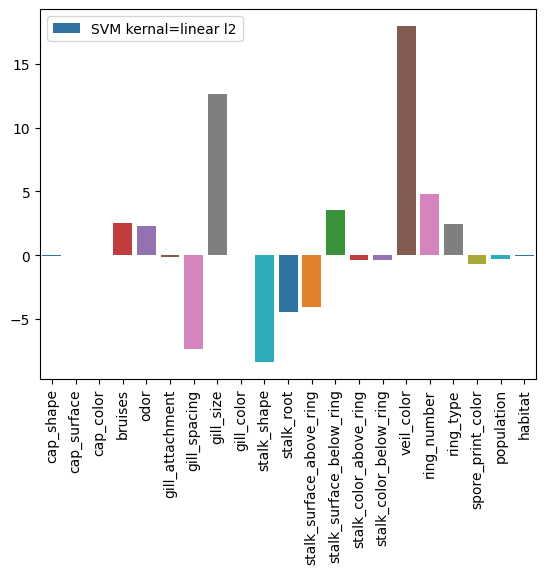

In [721]:
ax=sns.barplot(x=df_encoded.drop(['class','veil_type'],axis=1).columns, y=clf.coef_[0],palette='tab10',label='SVM kernal=linear l2') 
ax=plt.xticks(rotation=90)
ax=plt.legend()

In [723]:
X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size = 0.2, random_state = 1)
# clf = make_pipeline(StandardScaler(), SVC(kernel='linear',gamma='auto'))

# should be able to use regularization on the SVC 

clf=SVC(kernel='rbf',gamma='auto')
# clf = SVC(random_state=42, gamma="auto")
clf.fit(X_train, y_train)
# clf.score(X_test,y_test)

print("accuracy: ",clf.score(X_test,y_test))
y_pred=clf.predict(X_test)
print("this is the default for confusion matrix()")
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy:  1.0
this is the default for confusion matrix()
[['TN' 'FP']
 ['FN' 'TP']]
confusion matrix: 
[[796   0]
 [  0 829]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       796
           1       1.00      1.00      1.00       829

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [478]:
clf.class_weight_

array([1., 1.])

#### Have also considered LinearSVC
#### Also going to test out the Feature selection using SelectFromModel

In [515]:
from sklearn.pipeline import Pipeline

# steps = [('scaler', StandardScaler()),
#          ('SVM', SVC(probability=True) )]


# steps = [('SVM', SVC(gamma='auto') )]
svc=SVC()
#
# There was a trick with specifying params when using pipeline and Grid Search
# note the SVC__ which 

# svc_params = {
#     'SVM__C': [1, 10, 100],
#     'SVM__gamma': [0.001, 0.0001,'auto'],
#     'SVM__kernel': ['linear','rbf']
# }

svc_params = {
    'C': [1, 10, ],
    'kernel': ['linear','rbf']
}

# svc_pipeline = Pipeline(steps)
SVCclf = GridSearchCV(svc, svc_params)
SVCclf.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf']})

In [725]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(SVCclf.best_estimator_)
print(SVCclf.best_score_)
print(SVCclf.best_params_)
print("\n")
print("accuracy: ",SVCclf.best_score_)
SVCclf.best_estimator_.fit(X_train,y_train)
y_pred=SVCclf.best_estimator_.predict(X_test)
print("this is the default for confusion matrix()")
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

SVC(C=10, kernel='linear')
0.9351014778325123
{'C': 10, 'kernel': 'linear'}


accuracy:  0.9351014778325123
this is the default for confusion matrix()
[['TN' 'FP']
 ['FN' 'TP']]
confusion matrix: 
[[779  17]
 [  4 825]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       796
           1       0.98      1.00      0.99       829

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [749]:
# feature_selection using LinearSVC and SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
print(lsvc.score(X, y))
sfm = SelectFromModel(lsvc, prefit=True)
X_new = sfm.transform(X)

0.9446017481226148


In [742]:
print(len(xcols[sfm.get_support()]))
xcols[sfm.get_support()]

18


Index(['cap_surface', 'cap_color', 'bruises', 'odor', 'gill_spacing',
       'gill_size', 'gill_color', 'stalk_shape', 'stalk_root',
       'stalk_surface_above_ring', 'stalk_surface_below_ring',
       'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_color',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [750]:
# feature_selection using LinearSVC and SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(Xo, yo)
print(lsvc.score(Xo, yo))
sfm = SelectFromModel(lsvc, prefit=True)
X_new = sfm.transform(Xo)
print(len(xcols[sfm.get_support()]))
xcols[sfm.get_support()]

0.9859657761910624
14


Index(['cap_shape', 'cap_color', 'odor', 'gill_spacing', 'gill_size',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'ring_type', 'spore_print_color', 'habitat'],
      dtype='object')

In [748]:
# feature_selection using LinearSVC and SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=10.0, penalty="l2", dual=False).fit(X, y)
print(lsvc.score(X, y))
sfm = SelectFromModel(lsvc, prefit=True)
print(len(xcols[sfm.get_support()]))
xcols[sfm.get_support()]

0.9514957528006894
5


Index(['gill_attachment', 'gill_spacing', 'gill_size',
       'stalk_surface_above_ring', 'veil_color'],
      dtype='object')

In [747]:
# feature_selection using LinearSVC and SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=10.0, penalty="l2", dual=False).fit(Xo, yo)
print(lsvc.score(Xo, yo))
sfm = SelectFromModel(lsvc, prefit=True)
# X_new = sfm.transform(X)
print(len(xcols[sfm.get_support()]))
xcols[sfm.get_support()]

1.0
7


Index(['gill_attachment', 'gill_spacing', 'gill_size', 'stalk_shape',
       'stalk_surface_above_ring', 'veil_color', 'ring_number'],
      dtype='object')

In [746]:
lsvc.score(Xo, yo)

1.0

### Naive Bayes

In [733]:

# seee if this can be improved and try extract important features
X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size = 0.2, random_state = 1)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("accuracy: ",gnb.score(X_test,y_test))
y_pred=gnb.predict(X_test)
print("this is the default for confusion matrix()")
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


accuracy:  0.976
this is the default for confusion matrix()
[['TN' 'FP']
 ['FN' 'TP']]
confusion matrix: 
[[783  13]
 [ 26 803]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       796
           1       0.98      0.97      0.98       829

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



In [736]:
X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size = 0.2, random_state = 42)
#  this is improved  from gaussian model but how to extract important features
from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB()
cnb.fit(X_train, y_train)
print("accuracy: ",cnb.score(X_test,y_test))
y_pred=cnb.predict(X_test)
print("this is the default for confusion matrix()")
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cnb.get_params()
# cnb.predict_proba(X_test[0,:])

accuracy:  0.9569230769230769
this is the default for confusion matrix()
[['TN' 'FP']
 ['FN' 'TP']]
confusion matrix: 
[[847   6]
 [ 64 708]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       853
           1       0.99      0.92      0.95       772

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'min_categories': None}

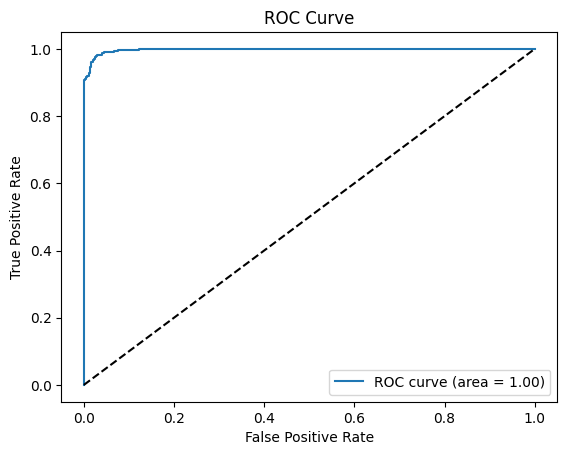

In [737]:

cnb_probs = cnb.predict_proba(X_test)[:,1]
cnb_fpr, cnb_tpr, _ = roc_curve(y_test, cnb_probs)
cnb_roc_auc = auc(cnb_fpr, cnb_tpr)
ax=plt.plot(cnb_fpr, cnb_tpr,label = 'ROC curve (area = %0.2f)' % cnb_roc_auc)
ax=plt.plot([0.0,1.0],[0.0,1.0],linestyle='--',c='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [739]:
## 
X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size = 0.2, random_state = 1)
best_Kvalue = 0
best_score = 0

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    print(knn.score(X_test,y_test))
    if knn.score(X_test,y_test) > best_score:
        best_score = knn.score(X_test,y_test)
        best_Kvalue = i

print("""Best KNN Value: {}
Test Accuracy: {}%""".format(best_Kvalue, round(best_score*100,2)))



1.0
0.9993846153846154
1.0
1.0
1.0
1.0
1.0
0.9993846153846154
1.0
Best KNN Value: 1
Test Accuracy: 100.0%


# Descision tree with Grid search and feature selection 

In [583]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline


dtc=DecisionTreeClassifier()

dtc_params = {
    'criterion': ['gini', 'entropy']
    #'max_features': ['auto', 'sqrt', 'log2'],
    #'max_depth': ['none',10,20] ,
    #'min_samples_split' : [2,5,10],
    #'min_samples_leaf': [1, 2, 4],
    #'class_weight': [None, "balanced"],
    #'min_impurity_decrease': [0.0, 0.1, 0.2]
}


DTCclf = GridSearchCV(dtc, dtc_params,scoring='f1',cv=5,verbose=3) # scoring='f1',scoring=None ,cv=6, verbose=0 
DTCclf.fit(X, y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ....................criterion=gini;, score=0.861 total time=   0.0s
[CV 2/5] END ....................criterion=gini;, score=1.000 total time=   0.0s
[CV 3/5] END ....................criterion=gini;, score=0.997 total time=   0.0s
[CV 4/5] END ....................criterion=gini;, score=1.000 total time=   0.0s
[CV 5/5] END ....................criterion=gini;, score=0.752 total time=   0.0s
[CV 1/5] END .................criterion=entropy;, score=0.805 total time=   0.0s
[CV 2/5] END .................criterion=entropy;, score=1.000 total time=   0.0s
[CV 3/5] END .................criterion=entropy;, score=1.000 total time=   0.0s
[CV 4/5] END .................criterion=entropy;, score=1.000 total time=   0.0s
[CV 5/5] END .................criterion=entropy;, score=0.757 total time=   0.0s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']}, scoring='f1',
             verbose=3)

In [584]:
# this one below gave a better score even without removing outliers 
print(DTCclf.best_estimator_)
print(DTCclf.best_score_)
print(DTCclf.best_params_)
best_params = DTCclf.best_params_

DecisionTreeClassifier()
0.9220454941623997
{'criterion': 'gini'}


In [585]:
depth = DTCclf.best_estimator_.tree_.max_depth  # Get the depth of the tree
num_nodes = DTCclf.best_estimator_.tree_.node_count  # Get the number of nodes in the tree

print("Depth of the decision tree:", depth)
print("Number of nodes in the decision tree:", num_nodes)

Depth of the decision tree: 7
Number of nodes in the decision tree: 39


In [586]:
from sklearn.model_selection import cross_val_score
dtc=DecisionTreeClassifier(criterion='gini')
print(cross_val_score(dtc, X, y, cv=5))
dtc=DecisionTreeClassifier(criterion='entropy')
print(cross_val_score(dtc, X, y, cv=5))
dtc=DecisionTreeClassifier(criterion='gini')
print(cross_val_score(dtc, Xo, y, cv=5))
dtc=DecisionTreeClassifier(criterion='entropy')
print(cross_val_score(dtc, Xo, y, cv=5))

[0.84307692 1.         1.         1.         0.92610837]
[0.84307692 1.         1.         1.         0.95566502]
[1.         1.         1.         1.         0.69950739]
[1.         1.         1.         1.         0.78817734]


In [757]:
X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size = 0.2, random_state = 0 ) 
# Make predictions on the testing data
dtc= DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
 # Evaluate the model's accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
 # Print the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
depth = dtc.tree_.max_depth  # Get the depth of the tree
num_nodes = dtc.tree_.node_count  # Get the number of nodes in the tree

print("Depth of the decision tree:", depth)
print("Number of nodes in the decision tree:", num_nodes)

Accuracy: 1.0
Confusion matrix:
[[838   0]
 [  0 787]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       838
           1       1.00      1.00      1.00       787

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Depth of the decision tree: 7
Number of nodes in the decision tree: 17


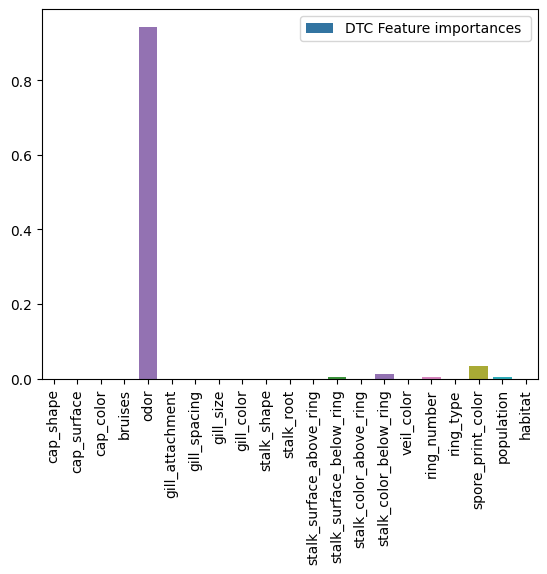

In [758]:
ax=sns.barplot(x=df_encoded.drop(['class','veil_type'],axis=1).columns, y=dtc.feature_importances_,palette='tab10',label='DTC Feature importances ') 
ax=plt.xticks(rotation=90)
ax=plt.legend()


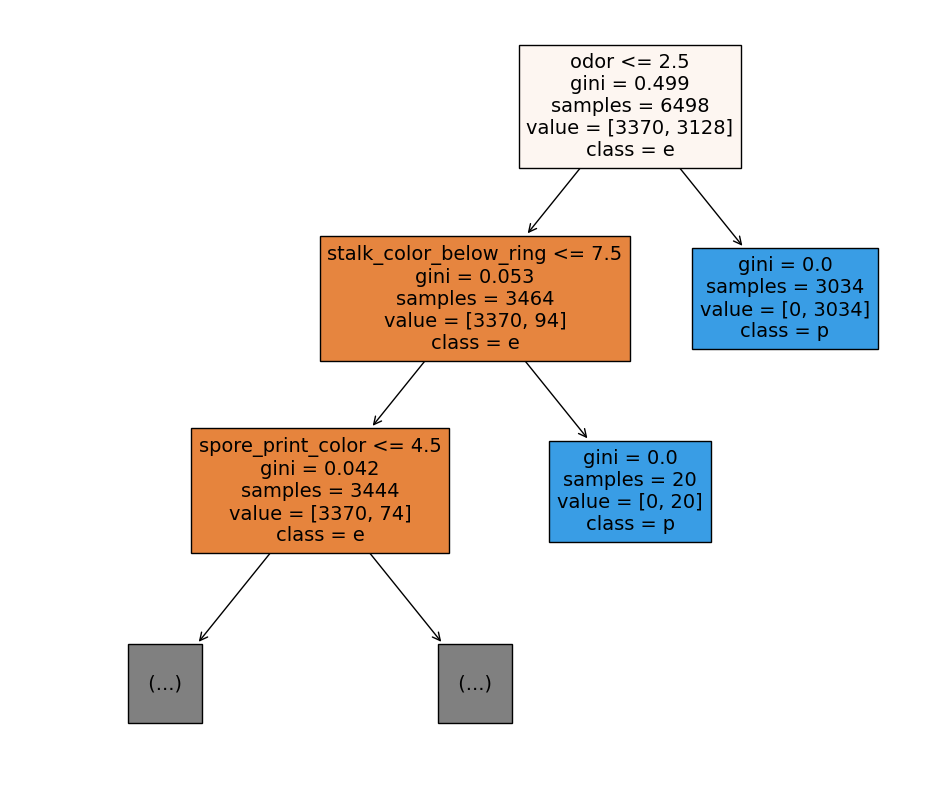

In [761]:
# GINI get smaller as we have less impurity 
from sklearn import tree
ax=plt.figure(figsize=[12,10])
ax= tree.plot_tree(dtc,max_depth=2,filled=True,feature_names=df_encoded.drop(['class','veil_type'],axis=1).columns,class_names=['e','p'])

In [762]:
# feature_selection using best estimator and SelectFromModel
from sklearn.feature_selection import SelectFromModel
bdtc = dtc.fit(Xo, yo)
sfm = SelectFromModel(bdtc, prefit=True)
X_new = sfm.transform(Xo)
print(np.shape(X_new))
columns[sfm.get_support()]

(8123, 1)


Index(['odor'], dtype='object')

In [598]:
# feature_selection using best estimator and SelectFromModel
from sklearn.feature_selection import SelectFromModel
bdtc = dtc.fit(X, y)
sfm = SelectFromModel(bdtc, prefit=True)
X_new = sfm.transform(X)
print(np.shape(X_new))
columns[sfm.get_support()]

(8123, 4)


Index(['gill_size', 'gill_color', 'spore_print_color', 'population'], dtype='object')

In [599]:
dtc=DecisionTreeClassifier(criterion='gini')
cross_val_score(dtc, X_new, y, cv=5)

array([0.91692308, 0.98953846, 0.98276923, 0.99876847, 0.64593596])

In [608]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 0 ) 
# Make predictions on the testing data
dtc= DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
 # Evaluate the model's accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
 # Print the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
dtc.feature_importances_

Accuracy: 0.9858461538461538
Confusion matrix:
[[830   8]
 [ 15 772]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       838
           1       0.99      0.98      0.99       787

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



array([0.1616803 , 0.36786823, 0.25534178, 0.21510968])

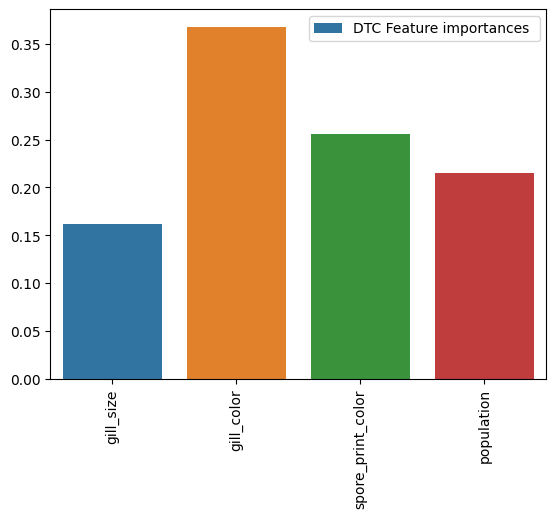

In [609]:
ax=sns.barplot(x=columns[sfm.get_support()], y=dtc.feature_importances_,palette='tab10',label='DTC Feature importances ') 
ax=plt.xticks(rotation=90)
ax=plt.legend()


In [610]:
depth = dtc.tree_.max_depth  # Get the depth of the tree
num_nodes = dtc.tree_.node_count  # Get the number of nodes in the tree

print("Depth of the decision tree:", depth)
print("Number of nodes in the decision tree:", num_nodes)

Depth of the decision tree: 11
Number of nodes in the decision tree: 63


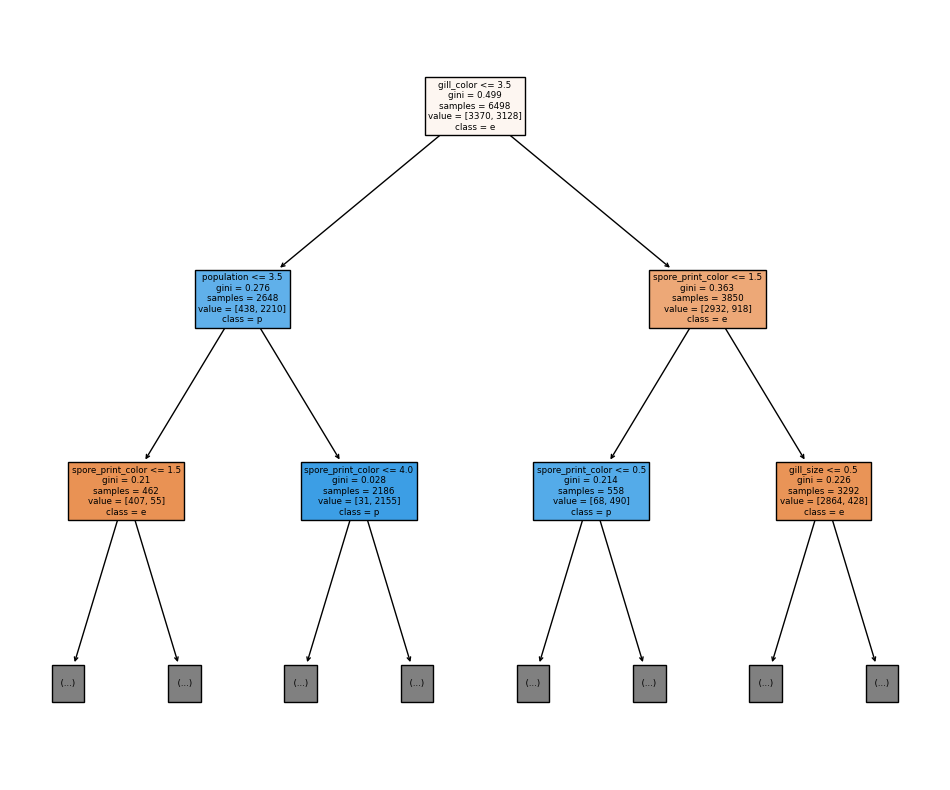

In [611]:
# GINI get smaller as we have less impurity 
from sklearn import tree
ax=plt.figure(figsize=[12,10])
ax= tree.plot_tree(dtc,max_depth=2,filled=True,feature_names=columns[sfm.get_support()],class_names=['e','p'])

In [612]:
# fixing the depth 
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 0 ) 
# Make predictions on the testing data
dtc= DecisionTreeClassifier(criterion='gini', max_depth=4)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
 # Evaluate the model's accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
 # Print the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
depth = dtc.tree_.max_depth  # Get the depth of the tree
num_nodes = dtc.tree_.node_count  # Get the number of nodes in the tree

print("Depth of the decision tree:", depth)
print("Number of nodes in the decision tree:", num_nodes)

Accuracy: 0.9673846153846154
Confusion matrix:
[[805  33]
 [ 20 767]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       838
           1       0.96      0.97      0.97       787

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625

Depth of the decision tree: 4
Number of nodes in the decision tree: 25


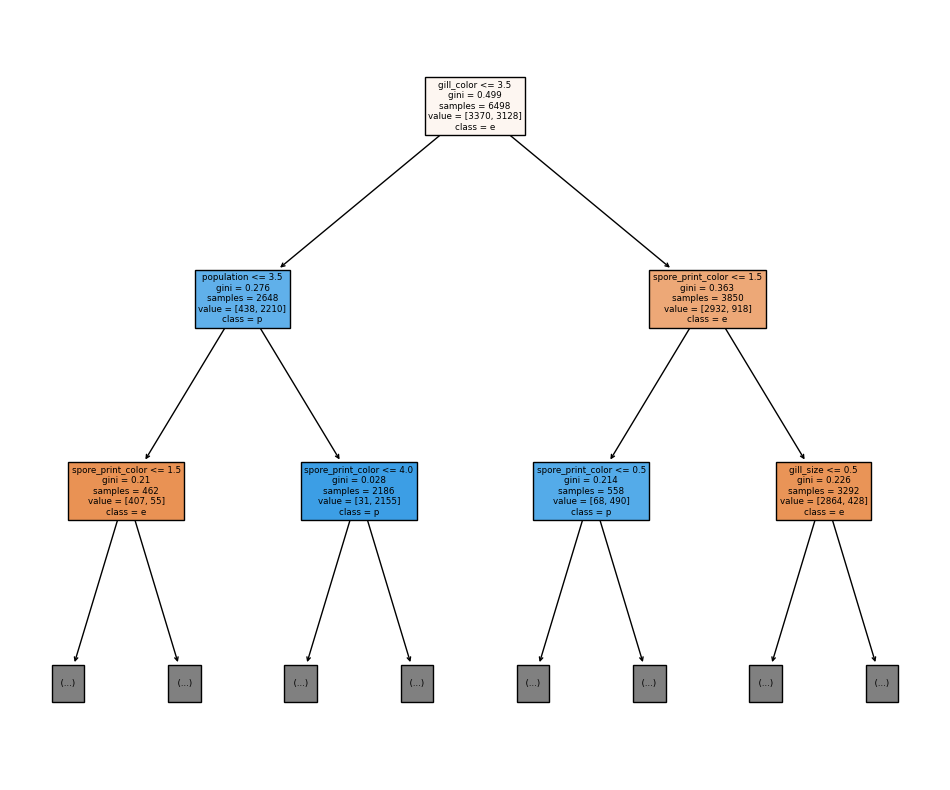

In [614]:
# GINI get smaller as we have less impurity 
# the tree is the same as above it just stoped at the specified depth
from sklearn import tree
ax=plt.figure(figsize=[12,10])
ax= tree.plot_tree(dtc,max_depth=2,filled=True,feature_names=columns[sfm.get_support()],class_names=['e','p'])

# learning curve

In [615]:
from sklearn.model_selection import learning_curve
dtc= DecisionTreeClassifier(criterion='gini')
train_sizes, train_scores, valid_scores = learning_curve(dtc, X, y, train_sizes=np.linspace(0.1,1.0,20), cv=5, shuffle=False)

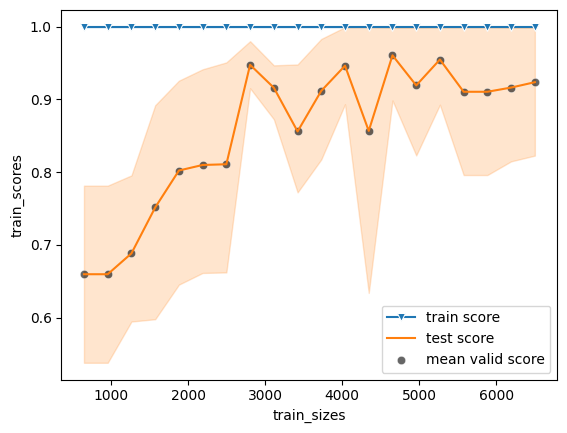

In [616]:
my_mean_valid_scores=np.mean(np.vstack(valid_scores),axis=1)

rts= np.reshape(train_scores.T,(1,-1))[0]
rvs= np.reshape(valid_scores.T,(1,-1))[0]
df=pd.DataFrame([rts,rvs,list(train_sizes)*5]).T
df.columns=['train_scores','valid_scores','train_sizes']
ax= sns.lineplot(data=df,x='train_sizes',y='train_scores',marker='v',label='train score')
ax= sns.lineplot(data=df,x='train_sizes',y='valid_scores',label='test score')
ax= sns.scatterplot(x=train_sizes ,y=my_mean_valid_scores,label='mean valid score',c='k',alpha=0.6)
ax=plt.legend(loc=4)

In [657]:
# reset data arrays
print(df_encoded.odor.head(10))
print(df_oencoded.odor.head(10))
X=df_encoded.drop(['class','veil_type'],axis=1).values
y=df_encoded['class'].values  # 1 is for poisonous 
Xo=df_oencoded.drop(['class','veil_type'],axis=1).values
yo=df_oencoded['class'].values  # 1 is for poisonous 

0    0
1    3
2    6
3    5
4    0
5    0
6    3
7    6
8    0
9    3
Name: odor, dtype: int8
0    1
1    2
2    5
3    0
4    1
5    1
6    2
7    5
8    1
9    2
Name: odor, dtype: int64


In [667]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline

np.random.seed(42)

#steps = [('scaler', StandardScaler()),
#         ('DTC', DecisionTreeClassifier())]
dtc=DecisionTreeClassifier()
# There was a trick with specifying params when using pipeline and Grid Search
# note the SVC__ which 

dtc_params = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
  #  'DTC__max_depth': ['none',10,20] ,
    'min_samples_split' : [2,5,10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, "balanced"],
    'min_impurity_decrease': [0.0, 0.1, 0.2]
}

# dtc_pipeline = Pipeline(steps)
DTCclf = GridSearchCV(dtc, dtc_params, scoring='f1',cv=5, verbose=1) # scoring='f1'
DTCclf.fit(X, y)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_impurity_decrease': [0.0, 0.1, 0.2],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=1)

In [668]:
print(DTCclf.best_estimator_)
print(DTCclf.best_score_)
print(DTCclf.best_params_)
best_params = DTCclf.best_params_

depth = DTCclf.best_estimator_.tree_.max_depth  # Get the depth of the tree
num_nodes = DTCclf.best_estimator_.tree_.node_count  # Get the number of nodes in the tree

print("Depth of the decision tree:", depth)
print("Number of nodes in the decision tree:", num_nodes)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_features='auto', min_samples_split=10)
0.965881777454906
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10}
Depth of the decision tree: 11
Number of nodes in the decision tree: 47


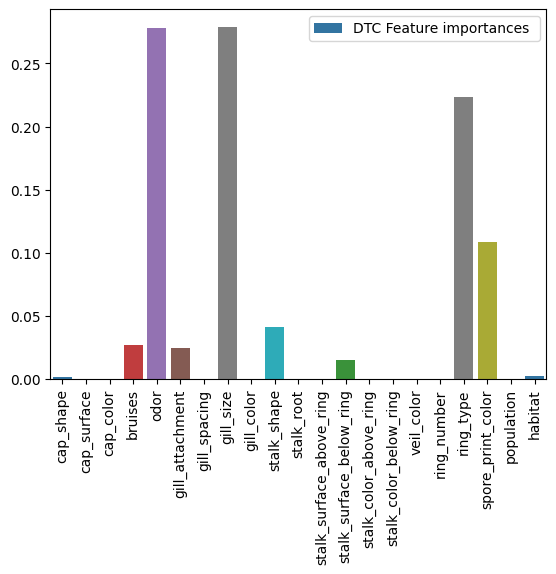

In [669]:
ax=sns.barplot(x=xcols, y=DTCclf.best_estimator_.feature_importances_,palette='tab10',label='DTC Feature importances ') 
ax=plt.xticks(rotation=90)
ax=plt.legend()

In [670]:
np.shape(X)

(8123, 21)

In [671]:
# feature_selection using best estimator and SelectFromModel
bdtc = DTCclf.best_estimator_   # no need to refit the best estimator 
sfm = SelectFromModel(bdtc, prefit=True)
X_new = sfm.transform(X)
print(np.shape(X_new))
xcols_new=xcols[sfm.get_support()]
print(xcols_new)

(8123, 4)
Index(['odor', 'gill_size', 'ring_type', 'spore_print_color'], dtype='object')


In [672]:
# fixing the depth 
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42 ) 
np.shape(X_train)
# Make predictions on the testing data
DTCclf.best_estimator_.fit(X_train, y_train)
y_pred = DTCclf.best_estimator_.predict(X_test)
 # Evaluate the model's accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
 # Print the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
depth = DTCclf.best_estimator_.tree_.max_depth  # Get the depth of the tree
num_nodes = DTCclf.best_estimator_.tree_.node_count  # Get the number of nodes in the tree

print("Depth of the decision tree:", depth)
print("Number of nodes in the decision tree:", num_nodes)
DTCclf.best_estimator_.feature_importances_

Accuracy: 0.9944615384615385
Confusion matrix:
[[844   9]
 [  0 772]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       853
           1       0.99      1.00      0.99       772

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Depth of the decision tree: 8
Number of nodes in the decision tree: 39


array([0.48986489, 0.24054414, 0.01317085, 0.25642012])

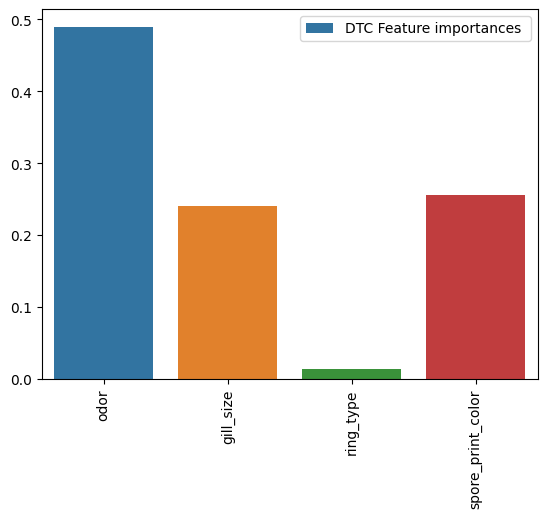

In [673]:
ax=sns.barplot(x=xcols_new, y=DTCclf.best_estimator_.feature_importances_,palette='tab10',label='DTC Feature importances ') 
ax=plt.xticks(rotation=90)
ax=plt.legend()

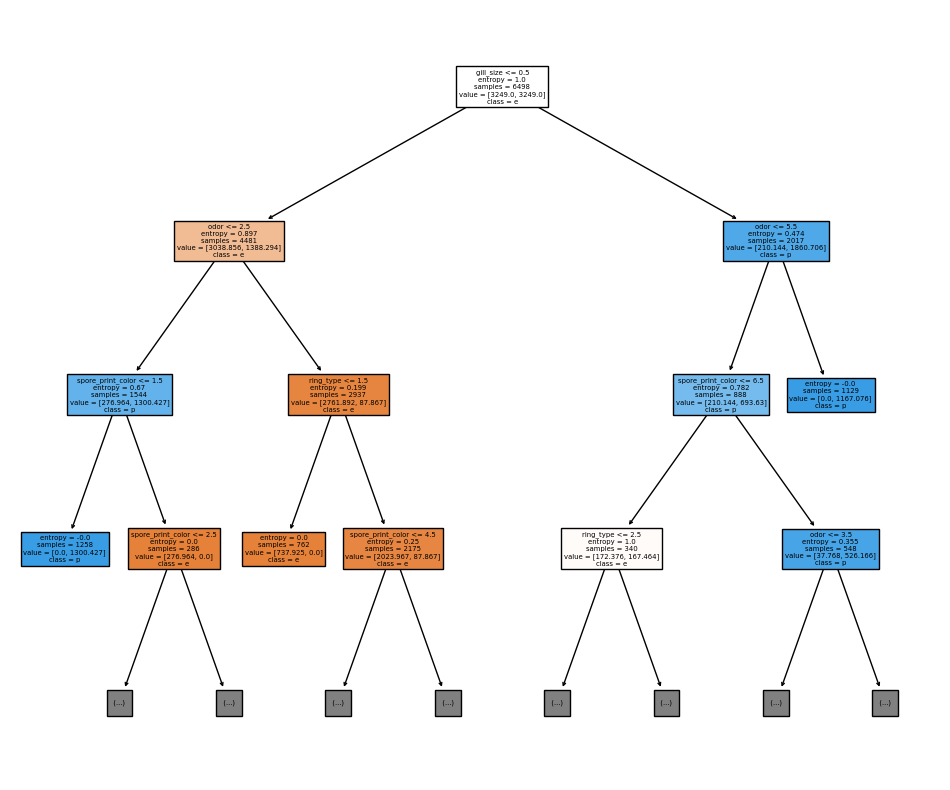

In [674]:
# GINI get smaller as we have less impurity 
# the tree is the same as above it just stoped at the specified depth
ax=plt.figure(figsize=[12,10])
ax= tree.plot_tree(DTCclf.best_estimator_,max_depth=3,filled=True,feature_names=xcols_new ,class_names=['e','p'])

## Principal Component Analysis

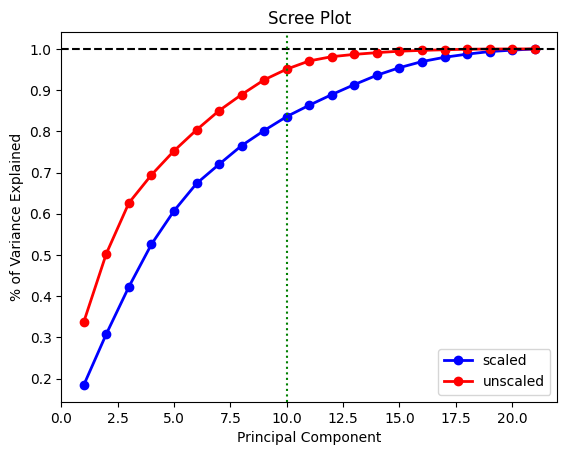

In [740]:
# this is more of an unsupervised learning excersis to determine feature importance 
# not going to include this

import numpy as np
from sklearn.decomposition import PCA

scaler = StandardScaler()
 # fit and transform the data
scaler.fit(X)
# X_scaled = scaler.fit_transform(X)
# pca = PCA(n_components=0.95)
# pca = PCA(n_components=2)
pca0 = PCA(n_components=21)
pca = PCA(n_components=21)
pca.fit(X_scaled)
pca0.fit(X)
# print(pca.explained_variance_ratio_)

# print(pca.singular_values_)  # eignvalue from SVD are ordered 
# print(pca.components_)     # this are eignvectors 


 # Create Scree Plot
plt.plot(range(1, pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_), 'bo-', linewidth=2,label='scaled')
plt.plot(range(1, pca0.n_components_+1), np.cumsum(pca0.explained_variance_ratio_), 'ro-', linewidth=2,label='unscaled')
plt.axhline(1,linestyle='--',c='k')
plt.axvline(10,linestyle=':',c='g')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('% of Variance Explained')
plt.legend()
plt.show()

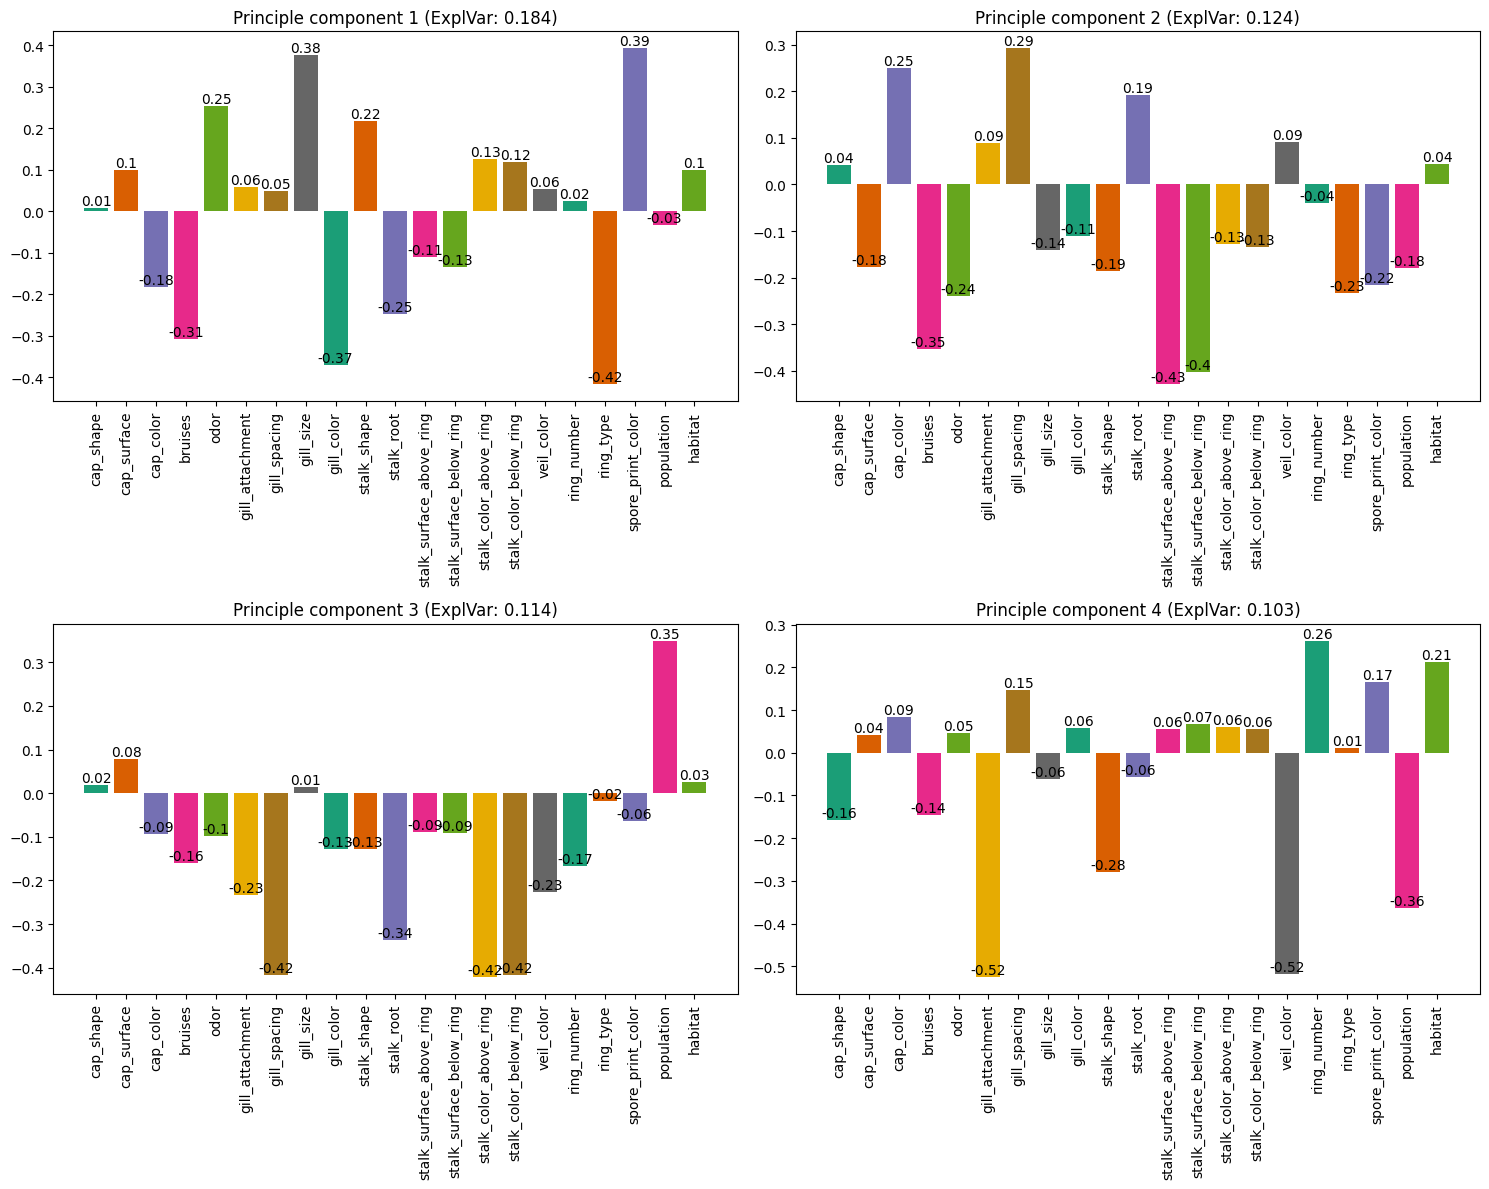

In [678]:
ev=pd.DataFrame(pca.components_[:2],columns=df_encoded.drop(['class','veil_type'],axis=1).columns)
# print(pca.components_[:2])
# print(ev.head())
# ev.plot.bar()
# ax=ev.iloc[0].plot.bar(palette='tab10')
# sns.barplot(data=ev.iloc[0])
# sns.barplot(data=ev)
# ax=plt.xticks(rotation=90)


 # plot the eigenvectors as barplots
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive'] 
palette = sns.color_palette('Dark2', n_colors=pca.components_.shape[0])
palette = sns.color_palette('Dark2')
columns=df_encoded.drop(['class','veil_type'],axis=1).columns
plt.figure(figsize=(15, 12))
for i in range(pca.components_[:4].shape[0]):
    plt.subplot(2, 2, i+1)
    bars=plt.bar(range(pca.components_.shape[1]), pca.components_[i],color=palette)
    plt.title(f"Principal component {i+1} (ExplVar: %.3f)" %pca.explained_variance_ratio_[i])
    plt.xticks(range(X.shape[1]), columns)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height(), round(bar.get_height(), 2), ha='center', va='bottom')
    bars=plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### check PCA with the odors as ordinal

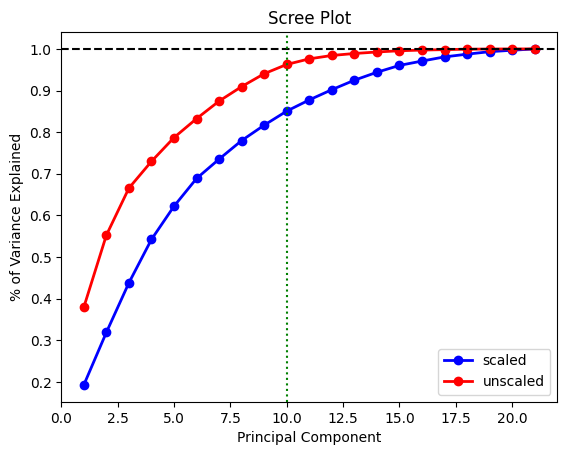

In [679]:
# this is more of an unsupervised learning excersis to determine feature importance  


scaler = StandardScaler()
 # fit and transform the data
scaler.fit(Xo)
Xo_scaled = scaler.fit_transform(Xo)
# pca = PCA(n_components=0.95)
# pca = PCA(n_components=2)
pca0 = PCA(n_components=21)
pca = PCA(n_components=21)
pca.fit(Xo_scaled)
pca0.fit(Xo)
# print(pca.explained_variance_ratio_)

# print(pca.singular_values_)  # eignvalue from SVD are ordered 
# print(pca.components_)     # this are eignvectors 


 # Create Scree Plot
plt.plot(range(1, pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_), 'bo-', linewidth=2,label='scaled')
plt.plot(range(1, pca0.n_components_+1), np.cumsum(pca0.explained_variance_ratio_), 'ro-', linewidth=2,label='unscaled')
plt.axhline(1,linestyle='--',c='k')
plt.axvline(10,linestyle=':',c='g')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('% of Variance Explained')
plt.legend()
plt.show()

In [ ]:
ev=pd.DataFrame(pca.components_[:2],columns=xcols)
# print(pca.components_[:2])
# print(ev.head())
# ev.plot.bar()
# ax=ev.iloc[0].plot.bar(palette='tab10')
# sns.barplot(data=ev.iloc[0])
# sns.barplot(data=ev)
# ax=plt.xticks(rotation=90)


 # plot the eigenvectors as barplots
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive'] 
palette = sns.color_palette('Dark2', n_colors=pca.components_.shape[0])
palette = sns.color_palette('Dark2')
columns=df_encoded.drop(['class','veil_type'],axis=1).columns
plt.figure(figsize=(15, 12))
for i in range(pca.components_[:4].shape[0]):
    plt.subplot(2, 2, i+1)
    bars=plt.bar(range(pca.components_.shape[1]), pca.components_[i],color=palette)
    plt.title(f"Principal component {i+1} (ExplVar: %.3f)" %pca.explained_variance_ratio_[i])
    plt.xticks(range(X.shape[1]), columns)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height(), round(bar.get_height(), 2), ha='center', va='bottom')
    bars=plt.xticks(rotation=90)
plt.tight_layout()
plt.show()